<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Defining-the-Data-Directory-and-Result-Directory">Defining the Data Directory and Result Directory</a></li>
<li><a class="" href="#Extracting-Center-Information">Extracting Center Information</a></li>
<ol><li><a class="" href="#Initializing-the-Classes">Initializing the Classes</a></li>
<li><a class="" href="#Determining-the-Region-of-Interest">Determining the Region of Interest</a></li>
<li><a class="" href="#Reiniatilizing-the-Classes">Reiniatilizing the Classes</a></li>
<li><a class="" href="#Setting-the-Reference-Image">Setting the Reference Image</a></li>
<li><a class="" href="#Extracting-Center-Related-Information">Extracting Center Related Information</a></li>
<li><a class="" href="#Some-Preliminary-Analysis">Some Preliminary Analysis</a></li>
<ol><li><a class="" href="#None-Values">None Values</a></li>
<li><a class="" href="#Sample-Images">Sample Images</a></li>
</ol></ol><li><a class="" href="#Extracting-Informations-From-DataFrame">Extracting Informations From DataFrame</a></li>
<ol><li><a class="" href="#Frame-Informations">Frame Informations</a></li>
<ol><li><a class="" href="#Information-About-DataFrame">Information About DataFrame</a></li>
<li><a class="" href="#Information-about-Frames-Numbers">Information about Frames Numbers</a></li>
<ol><li><a class="" href="#Getting-Numerical-Frame-Number">Getting Numerical Frame Number</a></li>
</ol><li><a class="" href="#Creating-New-Columns">Creating New Columns</a></li>
<ol><li><a class="" href="#The-Region-and-Time">The Region and Time</a></li>
<li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Extracting-Values">Extracting Values</a></li>
<ol><li><a class="" href="#Height">Height</a></li>
<li><a class="" href="#Angles">Angles</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
</ol></ol></ol><li><a class="" href="#Fitting-Curves">Fitting Curves</a></li>
<ol><li><a class="" href="#The-Curves-to-be-Fitted">The Curves to be Fitted</a></li>
<li><a class="" href="#Region-III">Region III</a></li>
<ol><li><a class="" href="#Data-For-Region-III">Data For Region III</a></li>
<li><a class="" href="#Fitting-the-Curves-In-Region-III">Fitting the Curves In Region III</a></li>
<li><a class="" href="#Caparing-Results-For-Region-III">Caparing Results For Region III</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters-In-Region-III">Calculating Informations From Parameters In Region III</a></li>
<ol><li><a class="" href="#The-Speeds-In-Region-III">The Speeds In Region III</a></li>
<li><a class="" href="#The-Angle-In-Region-III">The Angle In Region III</a></li>
</ol><li><a class="" href="#Visualizating-Results-In-Region-III">Visualizating Results In Region III</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates-In-Region-III">x and y Coordinates In Region III</a></li>
<li><a class="" href="#Speeds-In-Region-III">Speeds In Region III</a></li>
<li><a class="" href="#Angle-In-Region-III">Angle In Region III</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations-In-Region-III">Getting The Required Informations In Region III</a></li>
<li><a class="" href="#Adding-the-Information-for-Region-III-to-DataFrame">Adding the Information for Region III to DataFrame</a></li>
</ol><li><a class="" href="#Region-I">Region I</a></li>
<ol><li><a class="" href="#Data-For-Region-I">Data For Region I</a></li>
<li><a class="" href="#Fitting-the-Curves">Fitting the Curves</a></li>
<li><a class="" href="#Caparing-Results">Caparing Results</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters">Calculating Informations From Parameters</a></li>
<ol><li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#The-Angle">The Angle</a></li>
</ol><li><a class="" href="#Visualizating-Results">Visualizating Results</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates">x and y Coordinates</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations">Getting The Required Informations</a></li>
</ol></ol><li><a class="" href="#Adding-the-Additional-Information">Adding the Additional Information</a></li>
<ol><li><a class="" href="#Saving-Informations-to-DataFrame">Saving Informations to DataFrame</a></li>
<li><a class="" href="#The-Text-Information">The Text Information</a></li>
<ol><li><a class="" href="#Creating-the-Text">Creating the Text</a></li>
<li><a class="" href="#Save-the-DataFrames">Save the DataFrames</a></li>
</ol>


# Imports


In [1]:
from extract_center import CenterExtracter
from run import Run
from misc_tools import Plotter, Smoother
from functools import partial
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore")
plt.rcdefaults()
matplotlib.rcParams["figure.figsize"] = (8, 6)


# Defining the Data Directory and Result Directory


In [5]:
sequence = "theta2_pass"
DATA_DIR = "../../data/extracted_images/" + sequence
RESULT_DIR = "../../data/results/" + sequence


# Extracting Center Information


## Initializing the Classes


In [6]:
run = Run(DATA_DIR, RESULT_DIR)
ce = CenterExtracter()


## Determining the _Region of Interest_


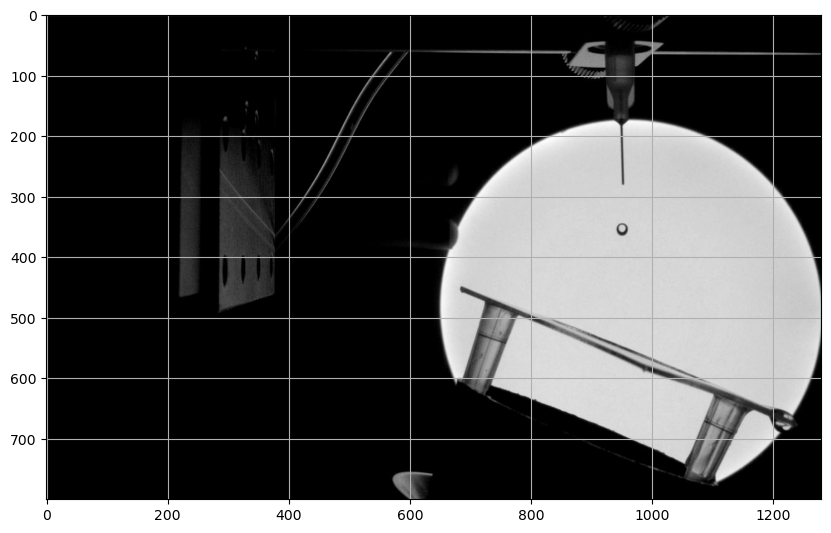

In [10]:
images = run.get_images()
img_1 = ce._read_image(images[0])
ce._show_image(img_1)


In [36]:
region_of_interset = (900, 300, 1000, 400)


## Reiniatilizing the Classes


In [37]:
run = Run(DATA_DIR, RESULT_DIR, region=region_of_interset)


## Setting the Reference Image


In [38]:
run._set_ref_image(42)


## Extracting Center Related Information


In [39]:
dynamic_cropping = True
if dynamic_cropping:
    file_name = "dynamic_ap.csv"
    df_name = "/dynamic_ap.csv"
else:
    file_name = "ap"
    df_name = "/centers_using_ap.csv"
df = run.all_points(
    crop_included=True,
    binary=True,
    verbose=False,
    # num_images=None,
    raise_error=False,
    file_name=file_name,
    dynamic_cropping=dynamic_cropping,
)


Getting list of images...


Extracting data from images...: 100%|██████████| 159/159 [00:02<00:00, 53.39it/s]

Saving to csv...
Done!


## Some Preliminary Analysis


### None Values


In [40]:
df.isna().sum()


id        0
x        57
y        57
r1       57
r2       57
theta    57
dtype: int64

In [41]:
none_values = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


In [42]:
none_values, unrealistic


(57, 7)

In [43]:
df = pd.read_csv(RESULT_DIR + df_name)


### Sample Images


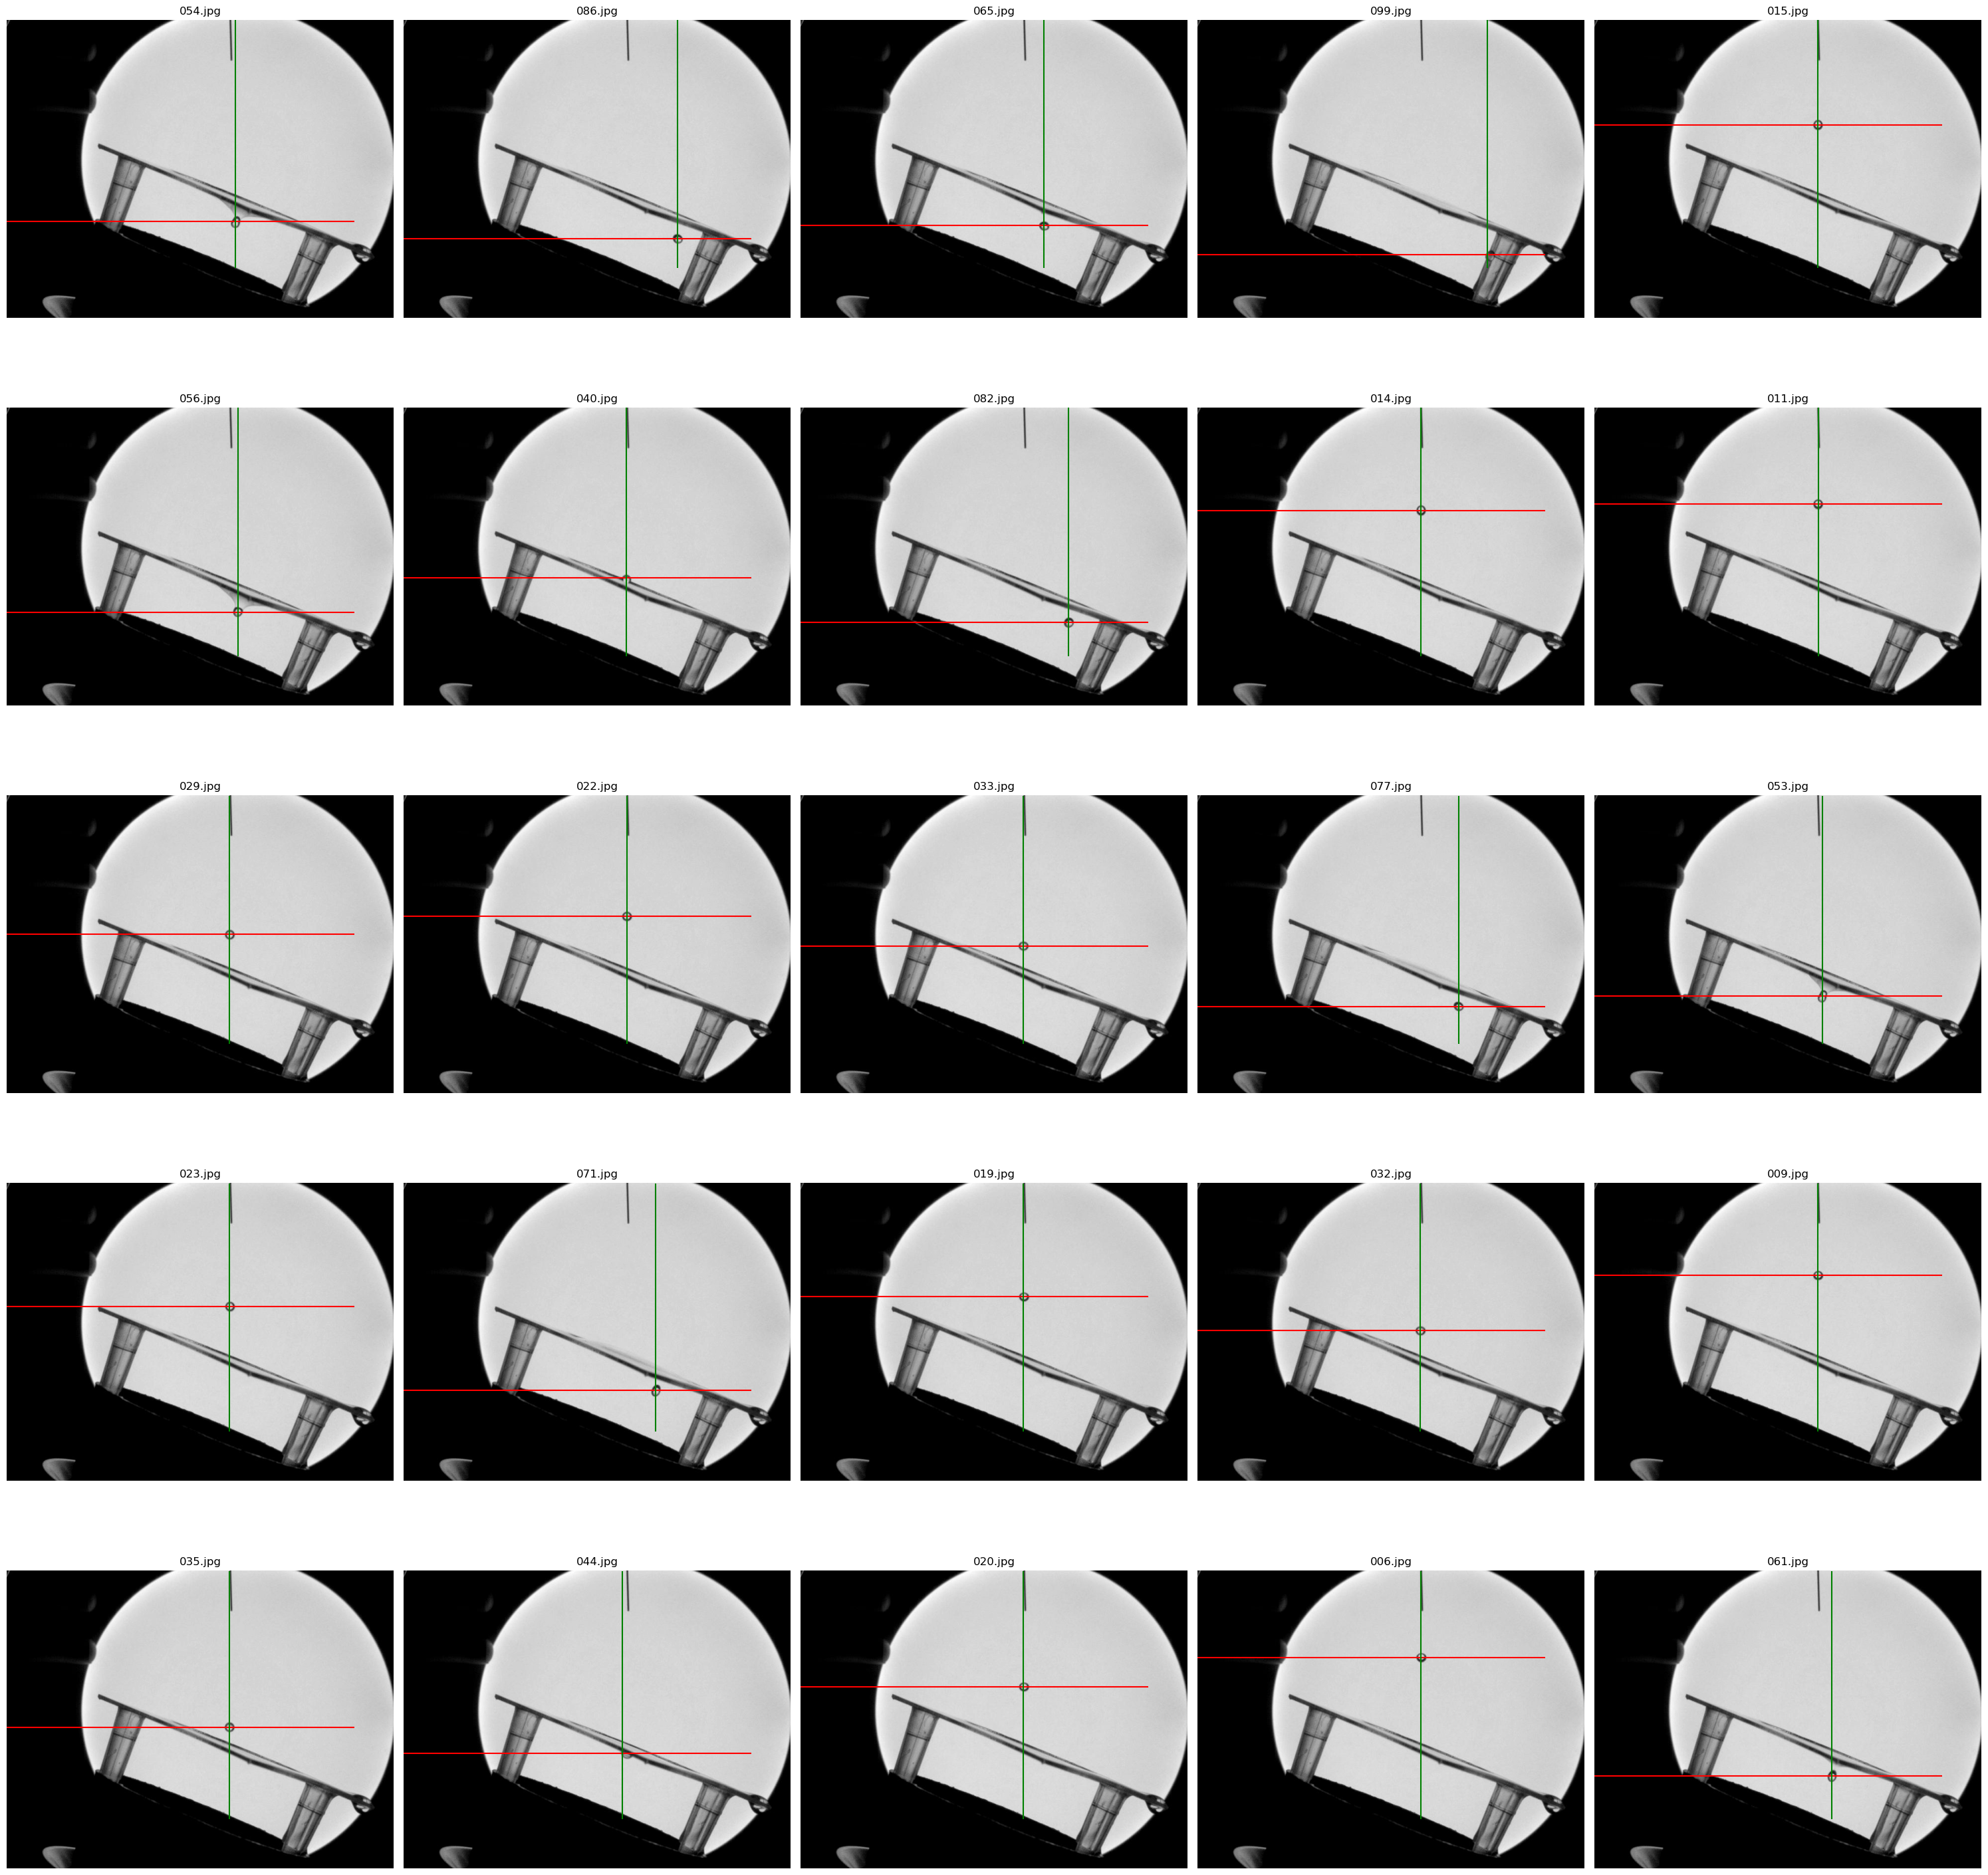

In [44]:
p = Plotter(df, RESULT_DIR)
p.get_samples(25, file_name=f"{sequence}_samples.png")


# Extracting Informations From DataFrame


## Frame Informations


### Information About DataFrame


In [45]:
df = pd.read_csv(RESULT_DIR + df_name)


In [46]:
none_frames = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


### Information about Frames Numbers


In [47]:
info_dict = {
    "first_frame": 1,
    "last_frame": 2,
    "contact_frame": 3,
    "leave_frame": 4,
    "angle": 5,
    "passthrough": 6,
}


In [48]:
def get_info(file):
    information = {}
    with open(file, "r") as f:
        texts = f.readlines()
    for key, value in info_dict.items():
        line = texts[value]
        info = line.split(":")[1].strip()
        information[key] = info
    return information


information = get_info(f"{DATA_DIR}.txt")


In [49]:
first_frame = DATA_DIR + "/" + information["first_frame"]
last_frame = DATA_DIR + "/" + information["last_frame"]
contact_frame = DATA_DIR + "/" + information["contact_frame"]
angle = information["angle"]
leave_frame = DATA_DIR + "/" + information["leave_frame"]
passthrough = information["passthrough"]


#### Getting Numerical Frame Number


In [50]:
reg = re.compile(r"\d{2,3}")
first_frame_num = int(reg.findall(first_frame)[0])
contact_frame_num = int(reg.findall(contact_frame)[0])
leave_frame_num = int(reg.findall(leave_frame)[0])
last_frame_num = int(reg.findall(last_frame)[0])
first_frame_num, contact_frame_num, leave_frame_num, last_frame_num


(0, 40, 62, 102)

In [51]:
df = df.loc[:last_frame_num]


## Creating New Columns


### The Region and Time


In [52]:
s = Smoother(df)
df_s = s.smoothen(remove_noise=False)
df_c = df[df["x"].notna()]


In [53]:
def get_region(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    if id <= first_frame_num:
        return "O"
    elif id >= first_frame_num and id <= contact_frame_num:
        return "I"
    elif id >= contact_frame_num and id <= leave_frame_num:
        return "II"
    else:
        return "III"


In [54]:
df_c["Region"] = df_c["id"].apply(get_region)
df_s["Region"] = df_s["id"].apply(get_region)


In [55]:
def get_time(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    return id


In [56]:
df_c["time"] = df_c["id"].apply(get_time)
df_s["time"] = df_s["id"].apply(get_time)


### The Speeds


In [57]:
df_s["vx"] = df_s["x"].diff(7) / 7
df_s["vy"] = df_s["y"].diff(7) / 7
df_s.fillna(0, inplace=True)
df_s["vx"] = df_s["vx"].astype(float)
df_s["vy"] = df_s["vy"].astype(float)
df_s["v"] = np.sqrt(df_s["vx"] ** 2 + df_s["vy"] ** 2)

df_c["vx"] = df_c["x"].diff(7) / 7
df_c["vy"] = df_c["y"].diff(7) / 7
df_c.fillna(0, inplace=True)
df_c["vx"] = df_c["vx"].astype(float)
df_c["vy"] = df_c["vy"].astype(float)
df_c["v"] = np.sqrt(df_c["vx"] ** 2 + df_c["vy"] ** 2)


In [58]:
# plt.plot(df_s["vy"], label = "smoothened")
# plt.plot(df_c["vy"], label = "raw")
# plt.legend();


In [59]:
# plt.plot(df_s["v"], label = "smoothened")
# plt.plot(df_c["v"], label = "raw")
# plt.legend();


### Angle


In [60]:
def get_angle(row):
    vx = row["vx"]
    vy = -row["vy"]
    if vx == 0 and vy == 0:
        return 0
    elif vx == 0:
        return 90
    else:
        return np.arctan(vy / vx) * 180 / np.pi


In [61]:
df_s["angle"] = df_s.apply(get_angle, axis=1)
df_c["angle"] = df_c.apply(get_angle, axis=1)


In [62]:
# plt.plot(df_s["angle"], label = "smoothened")
# plt.plot(df_c["angle"], label = "raw")
# plt.legend();


## Extracting Values


### Height


In [63]:
y0 = df_c[df_c["time"] == first_frame_num]["y"].values[0]
yc = df_c[df_c["time"] == contact_frame_num]["y"].values[0]
hc = yc - y0

y0 = df_s[df_s["time"] == first_frame_num]["y"].values[0]
ys = df_s[df_s["time"] == contact_frame_num]["y"].values[0]
hs = ys - y0
hc, hs


(189.0, 195.94668179239943)

### Angles


In [64]:
df_c[df_c["time"] == contact_frame_num].T


40
id      ../../data/extracted_images/theta2_pass/040.jpg
x                                                 948.0
y                                                 543.0
r1                                                  5.0
r2                                                  7.0
theta                                         101.41353
Region                                                I
time                                                 40
vx                                            -0.142857
vy                                             5.714286
v                                              5.716071
angle                                         88.567904

In [65]:
df_c[df_c["time"] == leave_frame_num].T


62
id      ../../data/extracted_images/theta2_pass/062.jpg
x                                                 982.0
y                                                 613.0
r1                                                  7.0
r2                                                 11.0
theta                                         19.480565
Region                                               II
time                                                 62
vx                                             2.714286
vy                                             0.714286
v                                              2.806698
angle                                        -14.743563

In [66]:
df_s[df_s["time"] == contact_frame_num].T


40
id      ../../data/extracted_images/theta2_pass/040.jpg
x                                             948.40329
y                                            549.946682
r1                                             7.341842
r2                                             7.973152
theta                                         44.176357
r                                               7.40329
Region                                                I
time                                                 40
vx                                             0.093563
vy                                             6.317019
v                                              6.317712
angle                                        -89.151435

In [67]:
df_s[df_s["time"] == leave_frame_num].T


62
id      ../../data/extracted_images/theta2_pass/062.jpg
x                                            981.124787
y                                            615.689922
r1                                             8.809983
r2                                             9.073927
theta                                         50.074388
r                                              8.731707
Region                                               II
time                                                 62
vx                                             2.483591
vy                                             1.368285
v                                              2.835565
angle                                        -28.851681

In [68]:
angle_at_contact_frame_s = df_s.loc[contact_frame_num]["angle"]
angle_at_leave_frame_s = df_s.loc[leave_frame_num]["angle"]

angle_at_contact_frame_c = df_c.loc[contact_frame_num]["angle"]
angle_at_leave_frame_c = df_c.loc[leave_frame_num]["angle"]


if angle_at_contact_frame_s < 0:
    angle_at_contact_frame_s = 180 + angle_at_contact_frame_s

if angle_at_contact_frame_c < 0:
    angle_at_contact_frame_c = 180 + angle_at_contact_frame_c


angle_at_contact_frame_c, angle_at_contact_frame_s, angle_at_leave_frame_c, angle_at_leave_frame_s


(88.56790381583536,
 90.84856469824221,
 -14.743562836470735,
 -28.851681069830768)

### Speeds


In [69]:
velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["v"]
velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["v"]
velocity_at_leave_frame_s, velocity_at_contact_frame_s


(2.835564907210717, 6.317712011945154)

In [70]:
velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["v"]
velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["v"]
velocity_at_leave_frame_c, velocity_at_contact_frame_c


(2.8066975291983574, 5.71607114964073)

In [71]:
x_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_s,
    x_velocity_at_contact_frame_s,
    y_velocity_at_leave_frame_s,
    y_velocity_at_contact_frame_s,
)

x_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_c,
    x_velocity_at_contact_frame_c,
    y_velocity_at_leave_frame_c,
    y_velocity_at_contact_frame_c,
)


2.4835912810955603 0.09356346055153608 1.3682845798557537 6.317019150257953
2.7142857142857144 -0.14285714285714285 0.7142857142857143 5.714285714285714


# Fitting Curves


## The Curves to be Fitted


We'll assume that downward is the positive direction. In this way, the gravitational acceleration is positive. In x direction, no force is acting and hence the equation of motion is simply:

$$
x(t) = x_0 + v_{x0}t
$$

Here $x_0$ is the initial x position, $v_{x0}$ is the initial y velocity.


Now, in y direction, the equation of motion is:

$$
y(t) = y_0 + v_{y0}t + \frac{1}{2}gt^2
$$

Here, $y_0$ is the initial y position, $v_{y0}$ is the initial y velocity, and $g$ is the acceleration due to gravity.


We'll optimize these two equations to get the initial velocity and the initial position for x and y direction.


We can also phrase the same problem by eliminating $t$ from the equation of motions. This way, we'll get $y$ as a function of $x$. Eliminating $t$ from the equation of motion, we get:

$$
y = y_0 + \frac{v_y}{v_x}(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$


Here, we have rewritten $v_{x0}$ as $v_x$ and $v_{y0}$ as $v_y$.

<!-- Defining $\frac{v_y}{v_x}$ as $m$, which is nothing but $\tan(\theta)$ where $\theta$ is the angle between the y and x velocity, we get:
$$
y = y_0 + m(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$ -->


This is a parabola with the parameters $x_0$, $y_0$, $v_y$, $v_x$ and $g$. We can use `scipy` to get these parameters. However, as we already know the values of $x_0$ and $y_0$ with reasonable accuracy, we'll use them.


Similarly, fitting the first two equations gives the same parameters.


In [72]:
def the_parabola_to_fit(x, m, a, x0, y0):
    second_term = (m) * (x - x0)
    third_term = a * ((x - x0) ** 2)
    return y0 + second_term + third_term


def parametric_x_to_fit(t, vx0, x0):
    return x0 + vx0 * t


def parametric_y_to_fit(t, vy0, g, y0):
    return y0 + vy0 * t + 0.5 * g * t**2


## Region III


### Data For Region III


In [126]:
region_3 = df_c[df_c["Region"] == "III"][:-2]


In [127]:
X = region_3["x"].values
x0 = X[0]
Y = region_3["y"].values
y0 = Y[0]
t = region_3["time"].values
offset = t[0]
tbar = t - offset


In [129]:
x0, y0


(984.0, 614.0)

In [130]:
tbar


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

### Fitting the Curves In Region III


In [131]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [132]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [133]:
popt, popty, poptx


(array([0.02789241, 0.00529421]),
 array([0.17449911, 0.08311495]),
 array([2.9220659]))

### Caparing Results For Region III


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [80]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(0.06444466348582073, 0.07426095425618673)

In [81]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(0.004741008681557467, 0.004624256735211385)

### Calculating Informations From Parameters In Region III


#### The Speeds In Region III


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [82]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle In Region III


Next, let's calculate the angle between the x and y velocity.


In [83]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results In Region III


#### x and y Coordinates In Region III


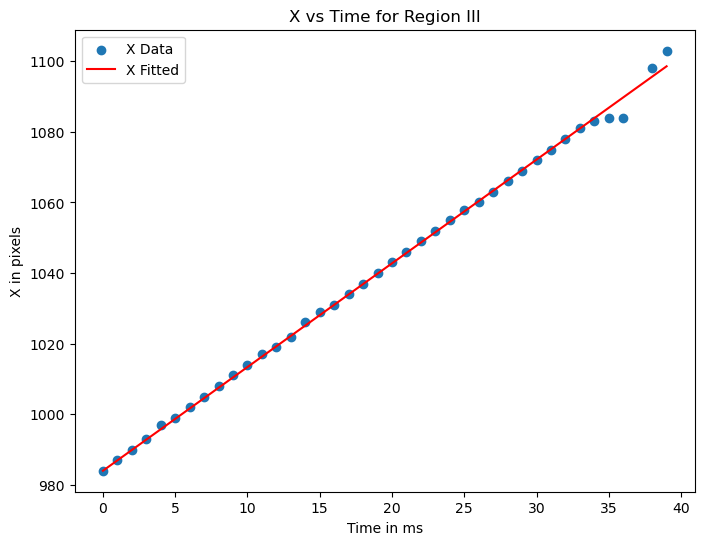

In [84]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region III"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


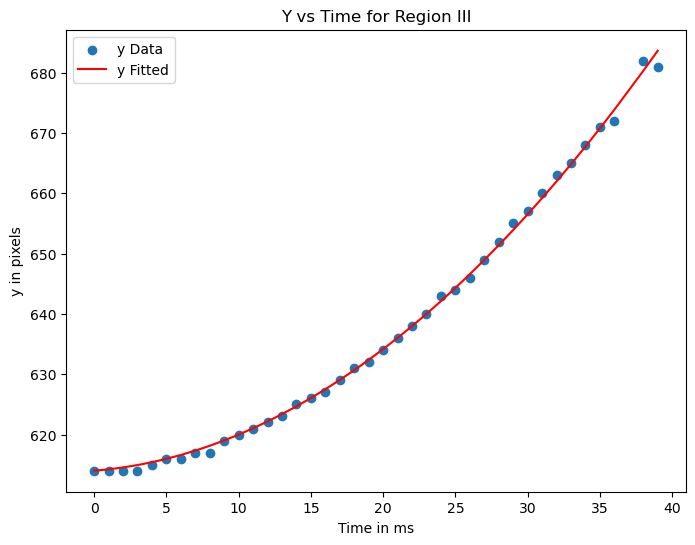

In [85]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region III"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


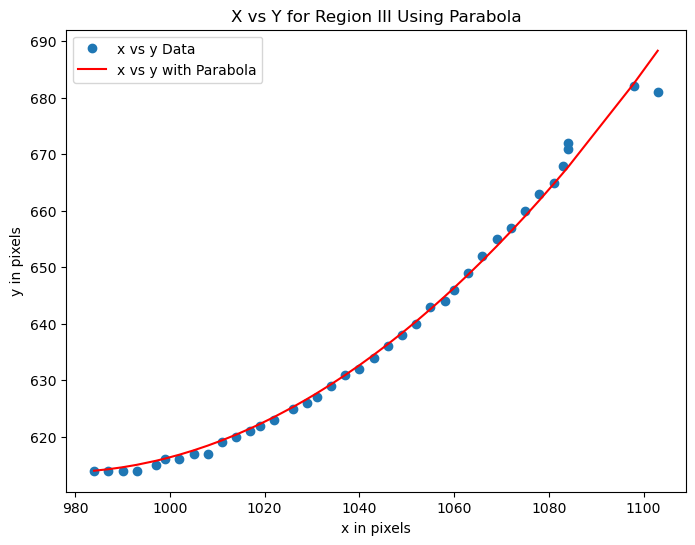

In [86]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


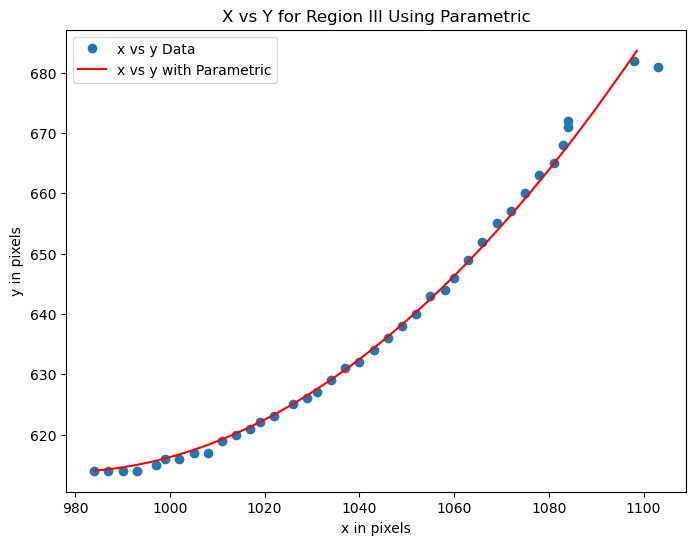

In [87]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parametric"
plt.plot(
    parametric_x_vector(tbar, *poptx),
    parametric_y_vector(tbar, *popty),
    "r",
    label="x vs y with Parametric",
)
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds In Region III


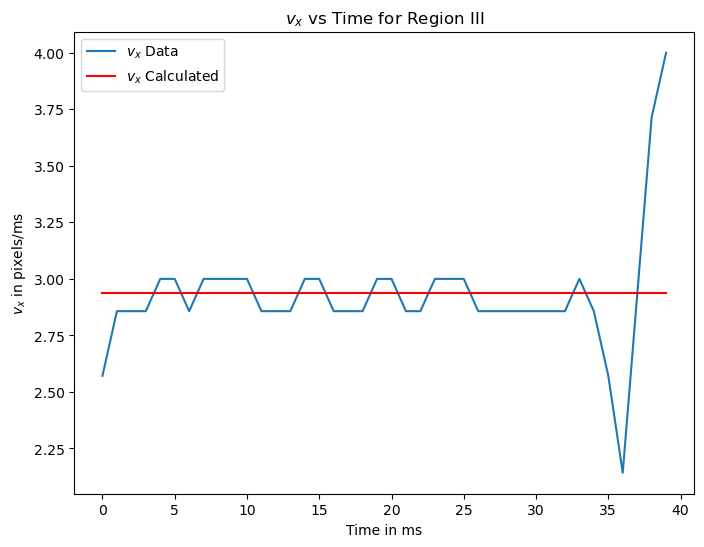

In [88]:
plt.plot(tbar, region_3["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region III"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


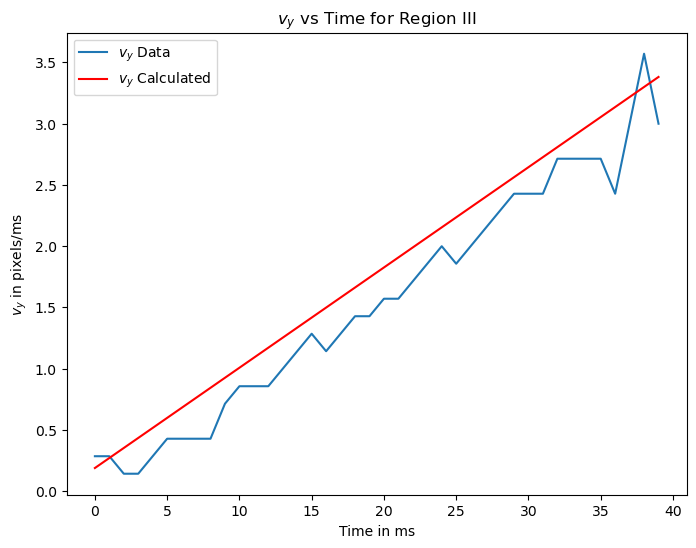

In [89]:
plt.plot(tbar, region_3["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region III"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


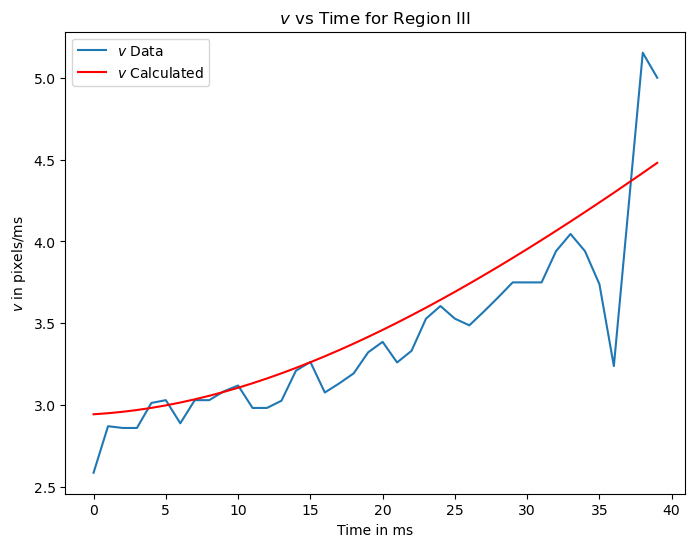

In [90]:
plt.plot(tbar, region_3["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region III"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle In Region III


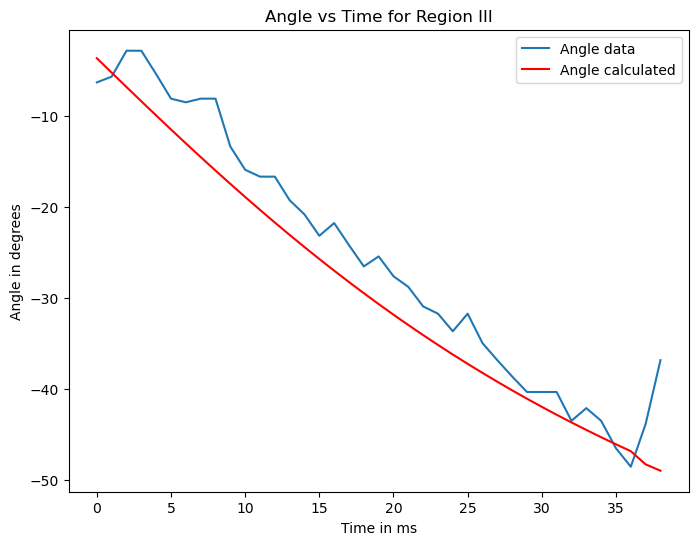

In [91]:
plt.plot(region_3["angle"].values, label="Angle data")
title = "Angle vs Time for Region III"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations In Region III


In [134]:
g_raw = popty[1]
vx_using_curve = poptx[0]
vy_using_curve = popty[1]
v_using_curve = np.sqrt(vx_using_curve**2 + vy_using_curve**2)


In [135]:
fps = 1000
pixels = 0.011914
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_in_region_3 = g_raw * acceleration_conversion
g_in_region_3


990.2315192445778

In [94]:
x_velocity_at_leave_frame_using_c = vx[0]
y_velocity_at_leave_frame_using_c = vy[0]
velocity_at_leave_frame_using_c = v[0]
angle_at_leave_frame_using_c = angles[0]
x_velocity_at_leave_frame_using_c, y_velocity_at_leave_frame_using_c, velocity_at_leave_frame_using_c, angle_at_leave_frame_using_c


(2.938187887959994, 0.18935052969769617, 2.944282881798488, 3.6873082662863346)

### Adding the Information for Region III to DataFrame


In [95]:
new_info_df_for_region_3 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_3.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


## Region I


### Data For Region I


In [96]:
region_1 = df_c[df_c["Region"] == "I"]


In [97]:
X = region_1["x"].values
x0 = X[0]
Y = region_1["y"].values
y0 = Y[0]
t = region_1["time"].values
offset = t[0]
tbar = t - offset


In [98]:
x0, y0


(951.0, 358.0)

In [99]:
tbar


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

### Fitting the Curves


In [100]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [101]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [102]:
popt, popty, poptx


(array([-52.703125,   2.865625]),
 array([3.1854645 , 0.08338448]),
 array([-0.06962025]))

### Caparing Results


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [103]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(-45.75485367182342, -52.70312500011715)

In [104]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(8.601695016184014, 2.865625000004054)

### Calculating Informations From Parameters


#### The Speeds


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [105]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle


Next, let's calculate the angle between the x and y velocity.


In [106]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results


#### x and y Coordinates


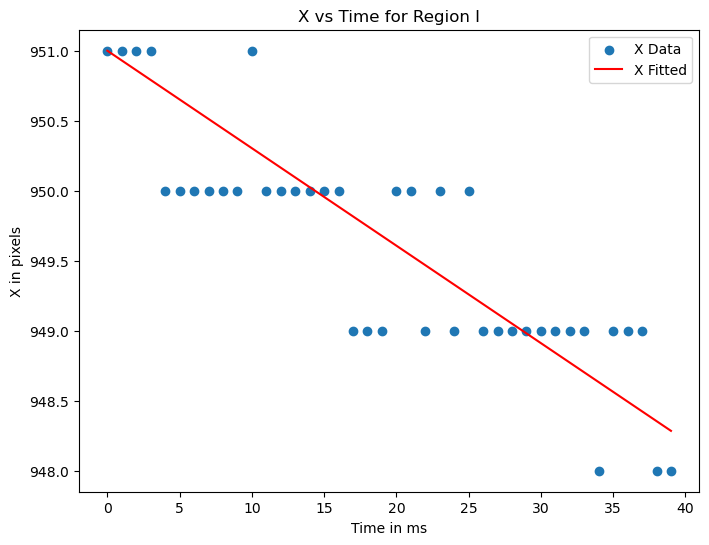

In [107]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region I"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


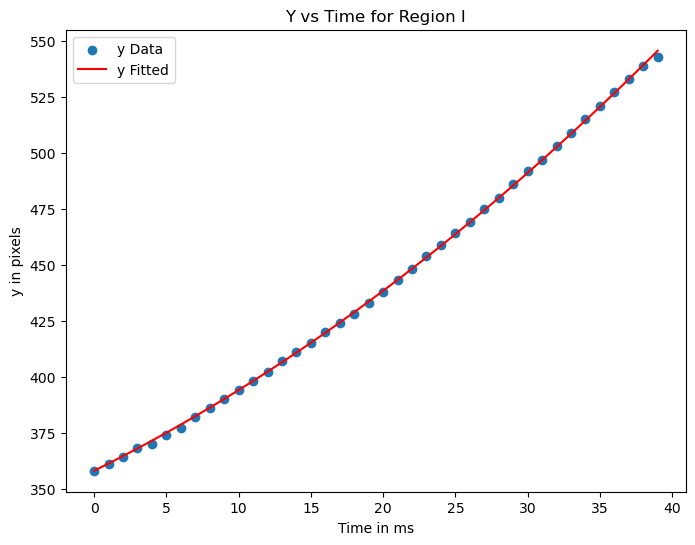

In [108]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region I"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


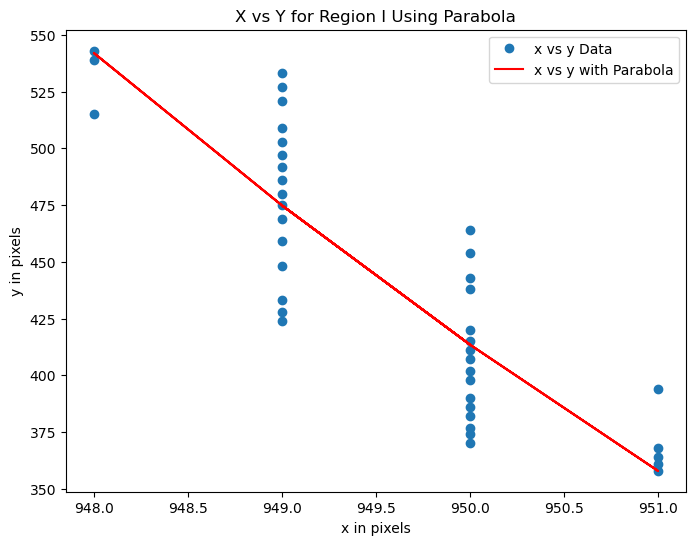

In [109]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


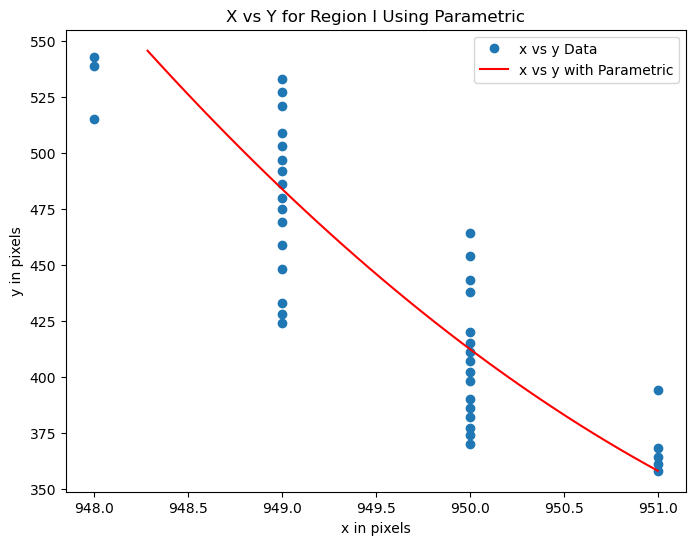

In [110]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parametric"
plt.plot(
    parametric_x_vector(tbar, *poptx),
    parametric_y_vector(tbar, *popty),
    "r",
    label="x vs y with Parametric",
)
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds


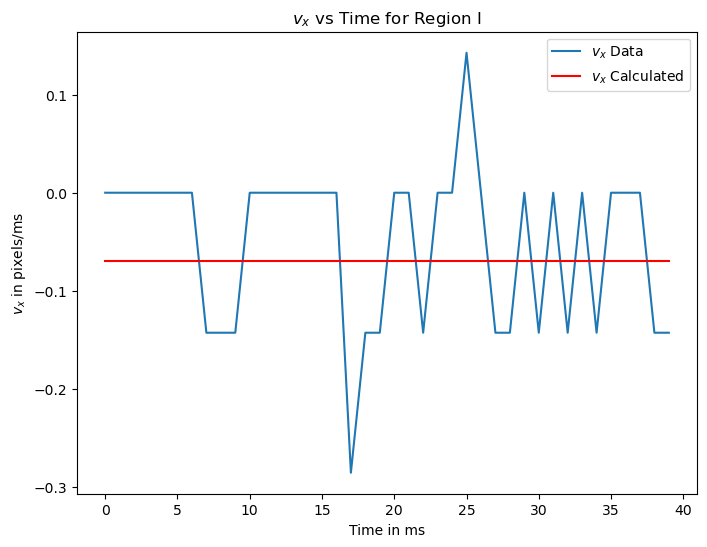

In [111]:
plt.plot(tbar, region_1["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region I"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


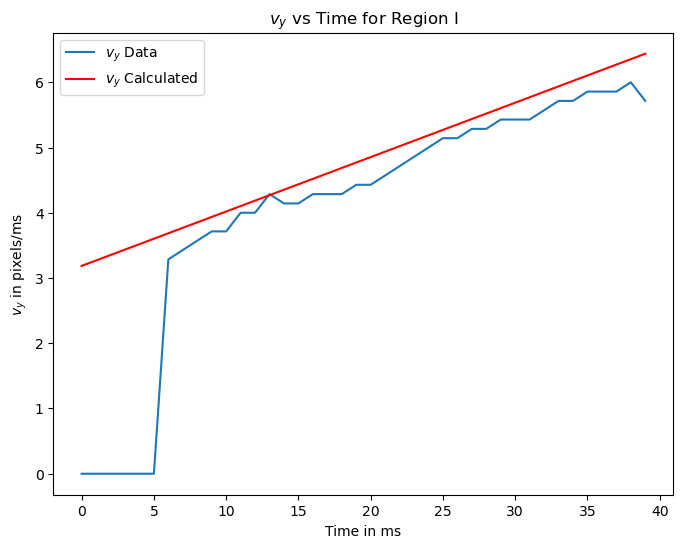

In [112]:
plt.plot(tbar, region_1["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region I"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


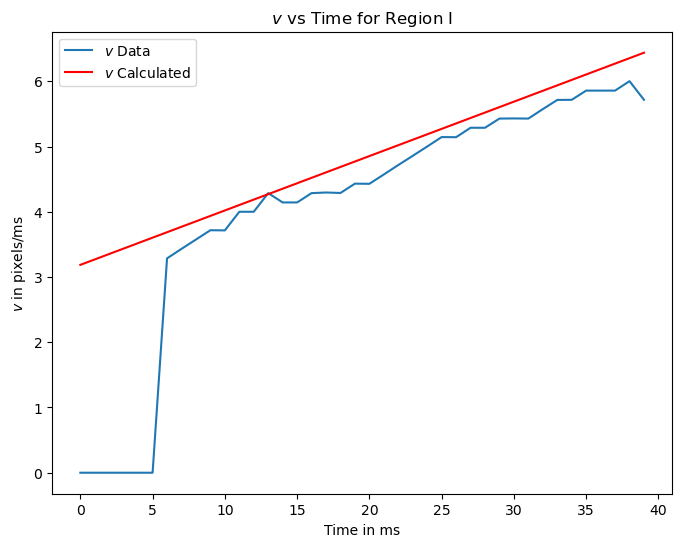

In [113]:
plt.plot(tbar, region_1["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region I"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle


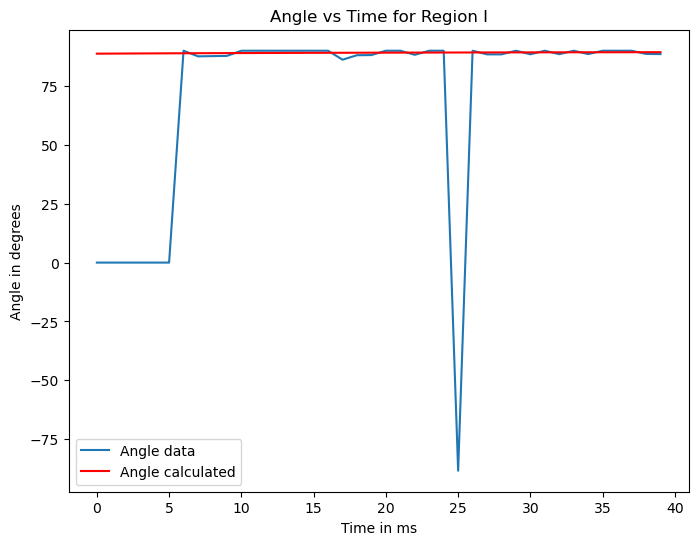

In [114]:
plt.plot(region_1["angle"].values, label="Angle data")
title = "Angle vs Time for Region I"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations


In [115]:
fps = 1000
pixels = 0.011914
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_raw = popty[1]
g_in_region_1 = g_raw * acceleration_conversion
g_in_region_1


993.4427115840399

In [116]:
x_velocity_at_contact_frame_using_c = vx[-1]
y_velocity_at_contact_frame_using_c = vy[-1]
velocity_at_contact_frame_using_c = v[-1]
angle_at_contact_frame_using_c = angles[-1]
x_velocity_at_contact_frame_using_c, y_velocity_at_contact_frame_using_c, velocity_at_contact_frame_using_c, angle_at_contact_frame_using_c


(-0.06962025316689036,
 6.437459271450126,
 6.437835727263488,
 -89.38037803419935)

In [117]:
h_using_c = Y[-1] - Y[0]
h_using_c


185.0

In [118]:
if angle_at_contact_frame_using_c < 0:
    angle_at_contact_frame_using_c = angle_at_contact_frame_using_c + 180


In [119]:
new_info_df_for_region_1 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_1.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


# Adding the Additional Information


## Saving Informations to DataFrame


In [120]:
info_df = pd.concat([new_info_df_for_region_1, new_info_df_for_region_3], axis=0)


In [121]:
df_final = pd.merge(df_c, info_df, on="time", how="left")
df_final.head()


id      x      y   r1   r2  \
0  ../../data/extracted_images/theta2_pass/000.jpg  950.0  354.0  8.0  8.0   
1  ../../data/extracted_images/theta2_pass/001.jpg  951.0  358.0  9.0  8.0   
2  ../../data/extracted_images/theta2_pass/002.jpg  951.0  361.0  9.0  8.0   
3  ../../data/extracted_images/theta2_pass/003.jpg  951.0  364.0  9.0  8.0   
4  ../../data/extracted_images/theta2_pass/004.jpg  951.0  368.0  8.0  8.0   

        theta Region  time   vx   vy    v  angle  vx_using_curve  \
0  115.164517      O     0  0.0  0.0  0.0    0.0             NaN   
1   85.370711      I     1  0.0  0.0  0.0    0.0        -0.06962   
2   84.224796      I     2  0.0  0.0  0.0    0.0        -0.06962   
3   76.776345      I     3  0.0  0.0  0.0    0.0        -0.06962   
4   52.139159      I     4  0.0  0.0  0.0    0.0        -0.06962   

   vy_using_curve  v_using_curve  angle_using_curve  
0             NaN            NaN                NaN  
1        3.185464       3.186225         -88.747965  
2        3.268849       3.269590         -88.779894  
3        3.352233       3.352956         -88.810234  
4        3.435618       3.436323         -88.839102

## The Text Information


### Creating the Text


In [122]:
pattern = "***"
information = f"""
{pattern*20}
### TOTAL FRAMES: {total_frames}
### NONE FRAMES: {none_frames}
### UNREALISTIC FRAMES: {unrealistic}
### PASSTHROUGH: {passthrough}

{pattern*20}
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: {np.round(hs, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_s+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_s, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_s, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_s, 2)}

{pattern*20}
USING THE RAW DATA
AT CONTACT FRAME:
### H: {np.round(hc, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_c, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_c, 2)}

{pattern*20}
USING CURVE FITTING
AT CONTACT FRAME:
### H: {np.round(h_using_c, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_using_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_using_c, 2)}
### g: {np.round(g_in_region_1, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(-angle_at_leave_frame_using_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_using_c, 2)}
### g: {np.round(g_in_region_3, 2)}
"""
print(information)



************************************************************
### TOTAL FRAMES: 159
### NONE FRAMES: 57
### UNREALISTIC FRAMES: 7
### PASSTHROUGH: 1

************************************************************
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: 195.9
### ANGLE: 22.85
### VELOCITY: 6.32
### X VELOCITY: 0.09
### Y VELOCITY: 6.32

AT LEAVE FRAME:
### ANGLE: -28.85
### VELOCITY: 2.84
### X VELOCITY: 2.48
### Y VELOCITY: 1.37

************************************************************
USING THE RAW DATA
AT CONTACT FRAME:
### H: 189.0
### ANGLE: 20.57
### VELOCITY: 5.72
### X VELOCITY: -0.14
### Y VELOCITY: 5.71

AT LEAVE FRAME:
### ANGLE: -14.74
### VELOCITY: 2.81
### X VELOCITY: 2.71
### Y VELOCITY: 0.71

************************************************************
USING CURVE FITTING
AT CONTACT FRAME:
### H: 185.0
### ANGLE: 22.62
### VELOCITY: 6.44
### X VELOCITY: -0.07
### Y VELOCITY: 6.44
### g: 993.44

AT LEAVE FRAME:
### ANGLE: -3.69
### VELOCITY: 2.94
### X VELOCI

First, create a new string containing just the previous text file. Else we'll duplicate the text file.


In [123]:
with open(RESULT_DIR + "/info.txt", "r+") as f:
    texts = f.readlines()
    text = "".join(texts[:6])
print(text[:125])
all_text = text + information


### theta2_pass.tif
### First Frame ID: 000
### Last Frame ID: 102
### Contact Frame ID: 040
### Leave Frame ID: 062
### Angl


In [124]:
with open(RESULT_DIR + "/info.txt", "w") as f:
    f.writelines(all_text)


### Save the DataFrames


In [125]:
df_final.to_csv(RESULT_DIR + f"/{sequence}_final.csv", index=False)
df_s.to_csv(RESULT_DIR + f"/{sequence}_smoothened.csv", index=False)
df_c.to_csv(RESULT_DIR + f"/{sequence}_raw.csv", index=False)
